# **Practical Lab-9 Dwarakanath Chandra (8856840)**

### **Question-1: Using Keras Datasets, obtain the fMNIST data set. Explore and describe it as you would do with any new dataset that you start working with**

In [100]:
# Install the required packages

from tensorflow.keras.datasets import fashion_mnist
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
import sklearn
import numpy as np

In [63]:
# Splitting the Fashion MNIST data into train and test datasets

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#### **Data Exploration**

In [64]:
print(f'Image DType: {type(train_images)}')
print(f'Image Element DType: {type(train_images[0,0,0])}')
print(f'Label Element DType: {type(train_labels[0])}')
print('**Shapes:**')
print('Train Data:')
print(f'Images: {train_images.shape}')
print(f'Labels: {train_labels.shape}')
print('Test Data:')  # the text images should be a random sample of the overall test set, and hence should have the same type, shape and image-size as the overall train set
print(f'Images: {test_images.shape}')
print(f'Labels: {test_labels.shape}')
print('Image Data Range:')
print(f'Min: {train_images.min()}')
print(f'Max: {train_images.max()}')

Image DType: <class 'numpy.ndarray'>
Image Element DType: <class 'numpy.uint8'>
Label Element DType: <class 'numpy.uint8'>
**Shapes:**
Train Data:
Images: (60000, 28, 28)
Labels: (60000,)
Test Data:
Images: (10000, 28, 28)
Labels: (10000,)
Image Data Range:
Min: 0
Max: 255


#### **There are total 70000 images in the fashion MNIST dataset, which is split into training set of 60000 images and a test set of 10000 images. Each image consists of 28 rows of 28 pixels each, making total 784 pixels. The images are in grayscale with pixel grayscale intensity ranging from 0 to 255, where 0 represents absolute black, 255 represents absolute white, and the intermediate values represents shades of gray.**

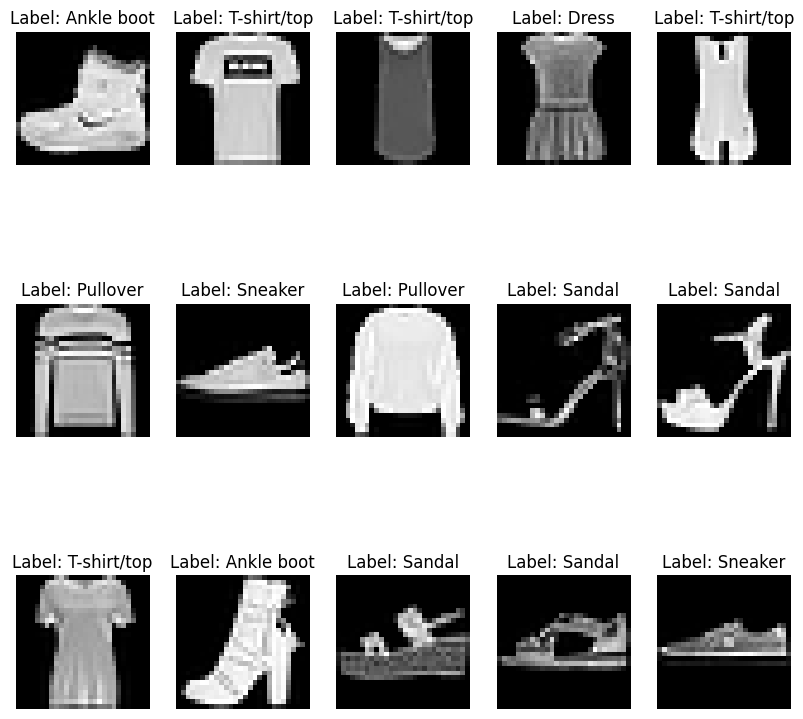

In [65]:
# plotting the first 15 images in the training set in grayscale
label_description = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

plt.figure(figsize=(10, 10))
for i in range(15):
    plt.subplot(3, 5, i + 1)
    plt.imshow(train_images[i], cmap = 'gray')
    plt.title(f"Label: {label_description[train_labels[i]]}")
    plt.axis('off')
plt.show()

In [66]:
# print the 15 labels of the first image in the training set   
print(f'Label: {train_labels[0:15]}')

Label: [9 0 0 3 0 2 7 2 5 5 0 9 5 5 7]


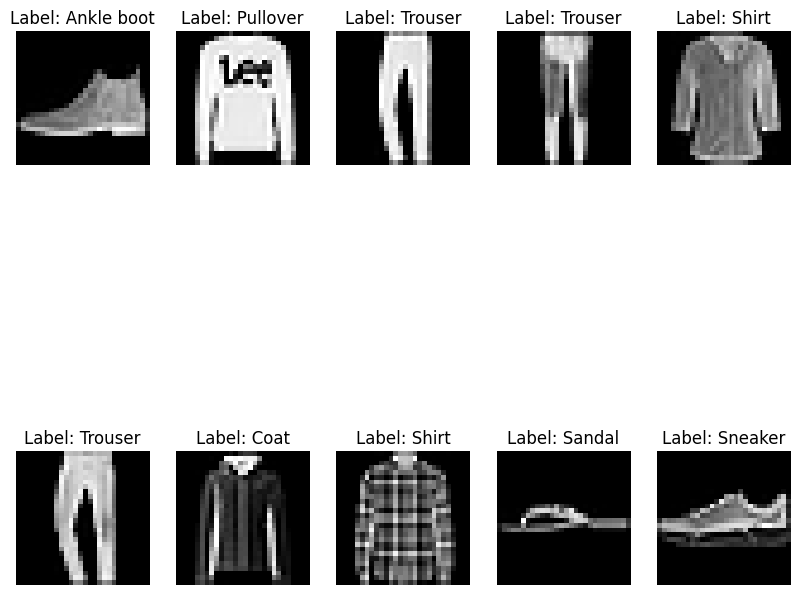

In [67]:
# plotting the first 10 images in the testing set in grayscale

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(test_images[i], cmap='gray')
    plt.title(f"Label: {label_description[test_labels[i]]}")
    plt.axis('off')
plt.show()

In [81]:
# print the 10 labels of the first image in the test set   
print(f'Label: {test_labels[0:10]}')

Label: [9 2 1 1 6 1 4 6 5 7]


#### **Data Preprocessing**

In [68]:
# Flattening the training and test data into a 1-dimensional array

train_images = train_images.reshape((60000, 28 * 28))  # flattening the 28x28 image into dim=1 (784,) vector
test_images = test_images.reshape((10000, 28 * 28))

# Normalizing the training and testing data so that values are in the range of [0,1]

train_images = train_images.astype("float32") / 255  # normalizing the data to the range [0,1] by min-max range, and casting it to float32
test_images = test_images.astype("float32") / 255

In [82]:
print(train_images.min())
print(train_images.max())
print(train_images.shape)
print(train_images[0].shape)

0.0
1.0
(60000, 784)
(784,)


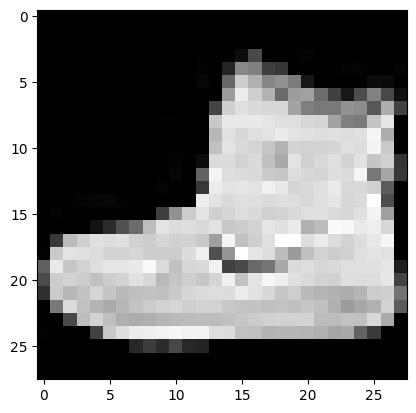

In [70]:
# Plotting the train data image after normalization

plt.imshow(train_images[0].reshape(28,28), cmap='gray')

#### **After normalization, the training image attributes remained the same. Hence, even after normalization the information is still retained in the preprocessed data. The normalization process impacts the pixel graysclae intensities to be normalized between 0 and 1. However, the underlying information and interpretation of data will resemble the original training and test datasets before normalization.**

### **Question-2: Train a dense neural network using Keras**

In [71]:
# Define the model

model = keras.Sequential([
    layers.Dense(512, activation="relu"), # First layer consists of 512 neurons with RELU activation function
    layers.Dense(10, activation="softmax") # Second layer consists of 10 neuron with Softmax activation (The output has 10 classes)
])

In [72]:
# Define the loss function, optimizer, and metrics

model.compile(optimizer="rmsprop",  
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [73]:
# Training ("Fitting") the model with training data

model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 5s 8ms/step - loss: 0.5649 - accuracy: 0.8008
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.3867 - accuracy: 0.8590
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3411 - accuracy: 0.8744
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.3154 - accuracy: 0.8840
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.2954 - accuracy: 0.8912


### **Inference: Using the Model to Make Predictions**


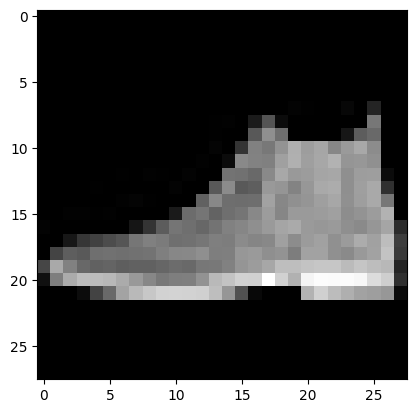

In [84]:
# Plotting the first image in the test dataset

plt.imshow(test_images[0].reshape(28,28), cmap='gray')  # the actual image

In [75]:
# a note on shapes: the model expects a 2D array of shape (batch_size, input_dim), so we need to reshape the test image to (1, 784)
# Compare:
print(test_images[0].shape)  # this will result in an error if given as input to the model (since it is a 1d array)
print(test_images[0:1].shape)  # this is a correct shape (2d)

(784,)
(1, 784)


In [85]:
# Predicting the first image of the test dataset

prediction = model.predict(test_images[0:1])  # the notation `[0:1]` is used to get the first element of the array, but in the desired shape of (None, 784). `None` in Tensorflow means any number of elements, and is used to indicate that the shape is dynamic (i.e. it can be any number of instances)  

1/1 [==============================] - 0s 54ms/step


In [86]:
# Displying the prediction probabilities of all classes

prediction  # 10 classes, each with a probability

array([[4.3349905e-07, 5.9424270e-09, 1.6332905e-07, 4.6068436e-07,
        2.6485927e-07, 6.3160522e-04, 1.2821844e-06, 2.0463595e-02,
        3.8215740e-06, 9.7889841e-01]], dtype=float32)

#### **We can see that, the label 9 has the highest prediction probability of 97.89% among all the other classes.**

In [78]:
prediction.argmax()  # the class with the highest probability

9

In [83]:
prediction[0, 9]  # the probability of the 9th class (of the zeroth data instance)

0.9788984

### **Predicting the output for the test data images using the dense layer NN model**

In [102]:
# Predicting the output for all test data

y_test_pred = model.predict(test_images)
print(y_test_pred)

# Display the prediction labels

y_pred_labels = np.argmax(y_test_pred, axis=1)
print("The Model prediction labels are: ", y_pred_labels)

313/313 [==============================] - 1s 3ms/step
[[4.33499054e-07 5.94241545e-09 1.63328892e-07 ... 2.04635803e-02
  3.82157032e-06 9.78898406e-01]
 [9.47640103e-07 1.35152707e-12 9.99826729e-01 ... 1.46170524e-13
  1.37557118e-11 7.67451762e-14]
 [4.84421776e-07 9.99997139e-01 1.44530821e-09 ... 1.66064974e-11
  1.79686821e-11 1.00033544e-10]
 ...
 [2.92723998e-03 4.22996943e-10 3.58763937e-04 ... 9.72857720e-07
  9.90225375e-01 6.71461642e-09]
 [8.09476397e-09 9.99976277e-01 1.00940167e-09 ... 3.51432594e-09
  5.35874767e-09 3.23335385e-08]
 [7.41550612e-05 1.49193065e-05 1.86290388e-04 ... 4.20324244e-02
  1.32387027e-03 2.14135274e-04]]
The Model prediction labels are:  [9 2 1 ... 8 1 5]


### **Question-3: Evaluate its accuracy. Report accuracy, confusion metric, explore specific examples of incorrect classification, and drew some conclusions from this exploration**

### **Determining the accuracy of the model on test data**

In [80]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 [==============================] - 1s 2ms/step - loss: 0.3718 - accuracy: 0.8665
test_acc: 0.8665000200271606


#### **The accuracy of the dense neural network model is 86.65%**

### **Building the confusion matrix of the model predictions for test data against ground truth**

In [103]:
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_labels, y_pred_labels)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[749   0  23  74   0   2 148   0   4   0]
 [  1 959   0  33   4   0   2   0   1   0]
 [  8   0 835  28  59   0  70   0   0   0]
 [  7   3   8 962   2   0  17   0   1   0]
 [  0   1 168 101 642   0  88   0   0   0]
 [  0   0   0   1   0 944   0  33   1  21]
 [ 80   0 109  74  42   0 688   0   7   0]
 [  0   0   0   0   0   7   0 972   0  21]
 [  4   0   6  11   4   2  13   5 955   0]
 [  0   0   0   0   0   2   1  38   0 959]]


#### **The diagonal elements of the confusion matrix represents the correct predictions of each output class, whereas the off-diogonal elements represents the misinterpreted outcomes. For instance, In the 10th row, there are 959 test images were correctly predicted as label - 9. However, 38 images were misinterpreted as label - 7, 1 image was identified as label - 6, and 2 images were classified wrongly as label - 5. Hence, though there are significant correct prediction in all the classes, there are some misinterpretyed predictions byu the model in each class. In conclusion, model further optimization may be necessary to improve the model performance. We can view the misalignement actual vs predicted labels in the following**

In [110]:
incorrect_indices = np.where(test_labels != y_pred_labels)
print('Total number of incorrect indices:', len(incorrect_indices[0]))
num_examples_to_explore = 5

# Example of how to explore incorrect predictions
for i in range(num_examples_to_explore):
    index = incorrect_indices[0][i]
    true_label = test_labels[index]
    predicted_label = y_pred_labels[index]
    print(f"Incorrect Example {i + 1}:")
    print("True Label:", true_label)
    print("Predicted Label:", predicted_label)


Total number of incorrect indices: 1335
Incorrect Example 1:
True Label: 7
Predicted Label: 5
Incorrect Example 2:
True Label: 4
Predicted Label: 2
Incorrect Example 3:
True Label: 5
Predicted Label: 7
Incorrect Example 4:
True Label: 9
Predicted Label: 5
Incorrect Example 5:
True Label: 4
Predicted Label: 2


### **Exploring the other classification performance metrics**

In [111]:
from sklearn.metrics import classification_report

class_names = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]

print("Classification Report:")
print(classification_report(test_labels, y_pred_labels, target_names=class_names))

Classification Report:
              precision    recall  f1-score   support

 T-shirt/top       0.88      0.75      0.81      1000
     Trouser       1.00      0.96      0.98      1000
    Pullover       0.73      0.83      0.78      1000
       Dress       0.75      0.96      0.84      1000
        Coat       0.85      0.64      0.73      1000
      Sandal       0.99      0.94      0.96      1000
       Shirt       0.67      0.69      0.68      1000
     Sneaker       0.93      0.97      0.95      1000
         Bag       0.99      0.95      0.97      1000
  Ankle boot       0.96      0.96      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



#### **Insights:**
#### * **The model has high precision and recall for classes such as "Trouser," "Sandal," "Bag," and "Ankle boot" classes.**
#### * **The "Pullover" and "Shirt" classes have lower precision and recall, indicating the models sub-optimal performance in predicting these.**
#### * **The macro-average F1-score, which gives equal weight to each class, is 0.87, indicating a considerable performance.**